<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/Reconocimiento_de_Audio_(Fourier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de Audio, Transformada de Fourier y su aplicación en RNNs

# Onda Sonora (Sonido)

Es una vibración que se propaga a través de un medio (como el aire, el agua o un sólido) que puede ser percibida por el oído humano y otras especies.

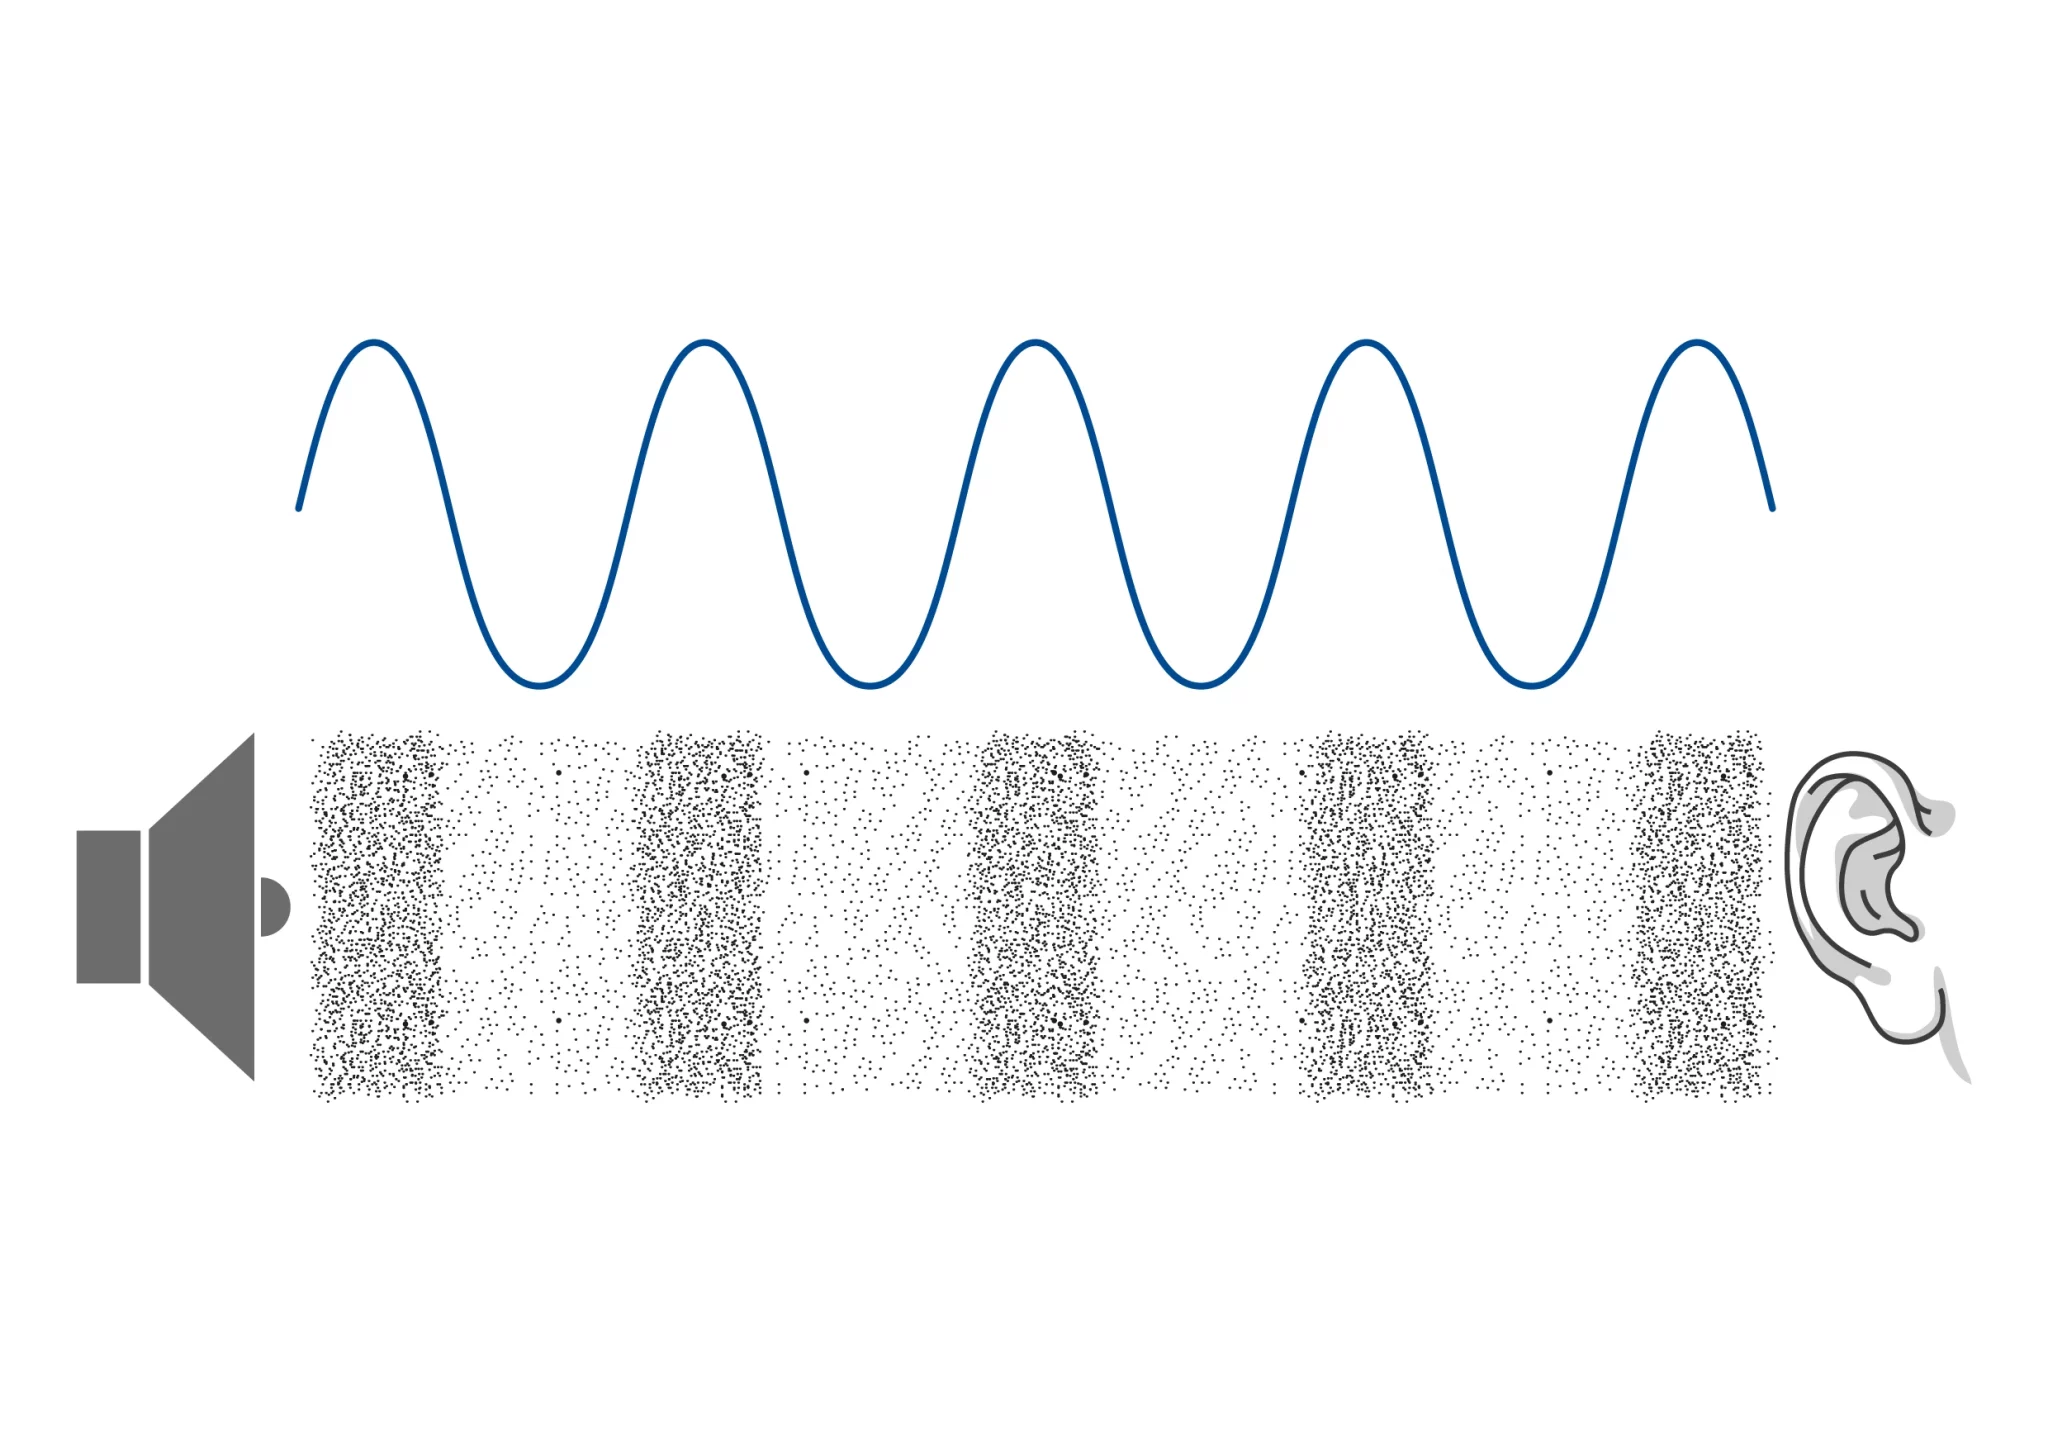

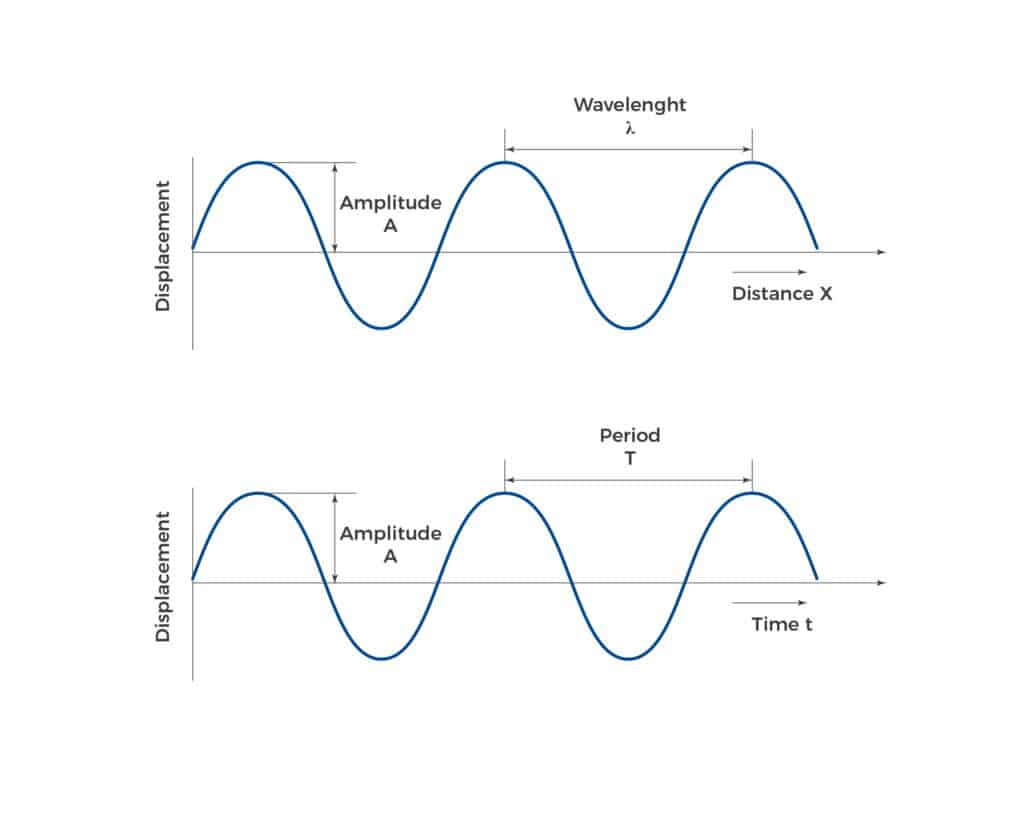

Herramienta interactiva: https://phet.colorado.edu/sims/html/sound-waves/latest/sound-waves_all.html

- Frecuencia: El número de oscilaciones o ciclos que ocurren en una onda sonora por segundo, medido en Hercios (Hz). La frecuencia de una onda sonora determina el tono del sonido: las frecuencias más altas producen sonidos más agudos y las frecuencias más bajas producen sonidos más graves.
- Longitud de onda (wavelenght): La distancia física entre dos puntos consecutivos en fase de una onda, como de cresta a cresta o de valle a valle. La longitud de onda de una onda sonora (λ) es inversamente proporcional a la frecuencia y está directamente relacionada con la velocidad del sonido (c) y la frecuencia de la onda (f) mediante la fórmula λ=c/f.
- La amplitud de una onda sonora representa el desplazamiento máximo de partículas de su posición de equilibrio debido al paso de la onda. En las ondas sonoras, la amplitud está relacionada con el volumen del sonido, y amplitudes mayores producen sonidos más fuertes.
- Velocidad: La velocidad a la que una onda sonora viaja a través de un medio. La velocidad del sonido varía según el medio y sus propiedades (p. ej., densidad, temperatura y elasticidad), siendo más rápida en sólidos, más lenta en líquidos y más lenta en gases.
- Intensidad: La potencia transportada por una onda sonora por unidad de área, medida en Watts por metro cuadrado (W/m2). La intensidad es una medida de la energía de la onda sonora y está relacionada tanto con su amplitud como con la distancia desde la fuente, lo que influye en el volumen que se percibe el sonido.
- Fase: describe la posición de un punto en el tiempo en un ciclo de forma de onda. En el contexto de múltiples ondas que interactúan, las diferencias de fase pueden provocar fenómenos como interferencias constructivas o destructivas, afectando significativamente la amplitud e intensidad del sonido resultante.

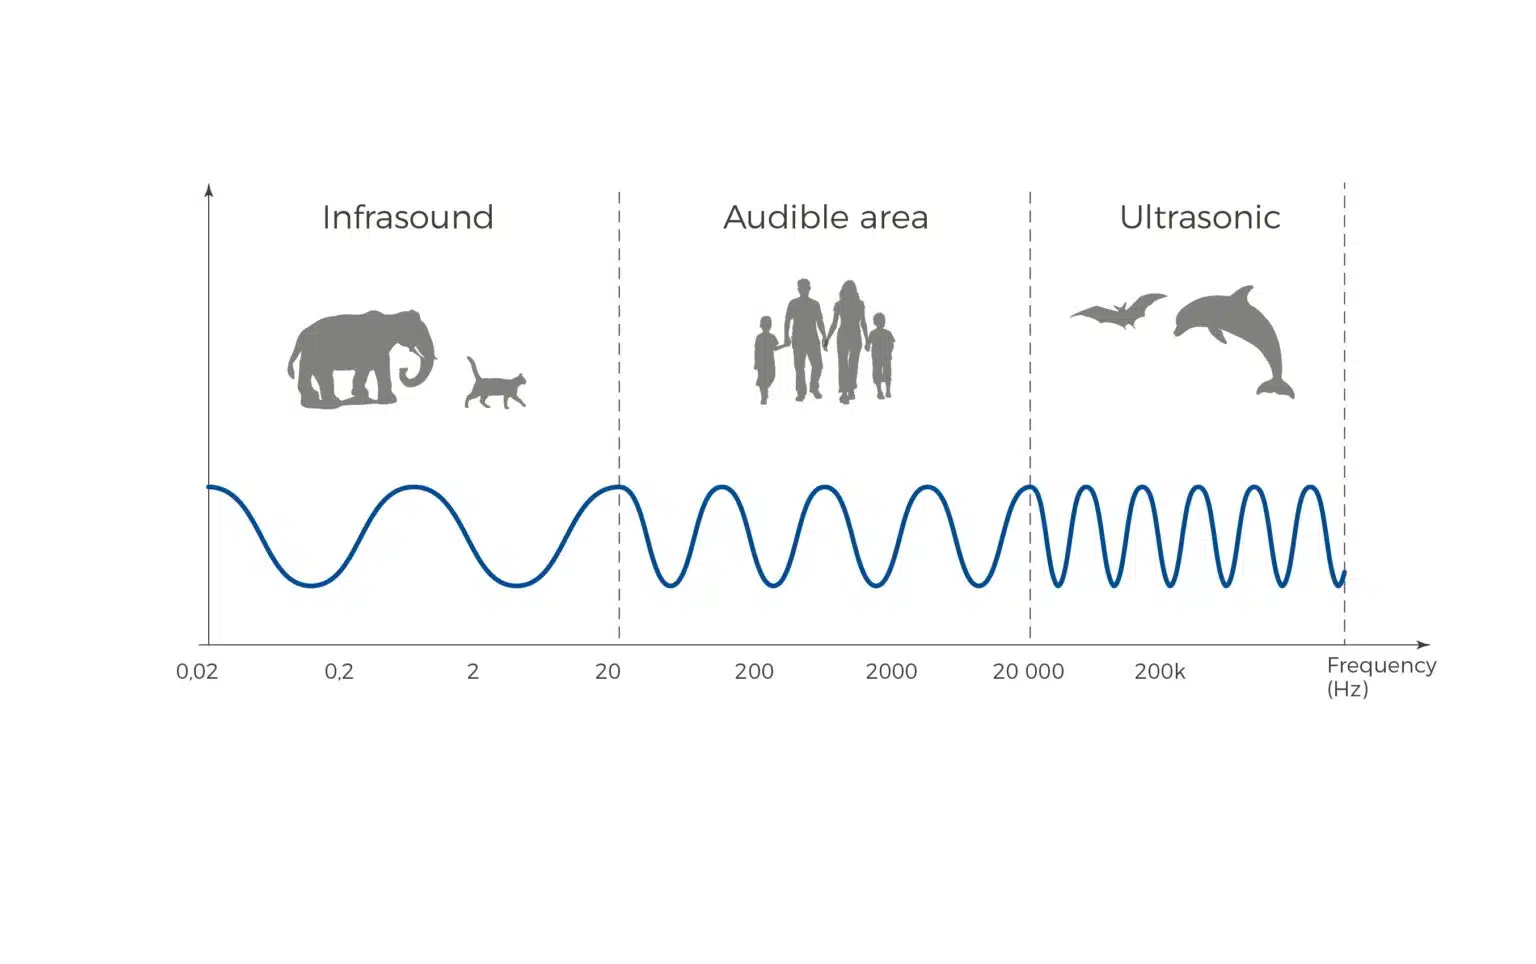

# Transformada de Fourier (TF)

Descompone una señal (como un sonido, una imagen o cualquier onda) en sus frecuencias básicas, revelando "qué ingredientes" la forman.

Aplicaciones:

- En audio: para ecualizar música, reconocer voces o comprimir archivos (como MP3).

- En imágenes: para aplicar filtros, eliminar ruido o comprimir (como JPEG).

- En ingeniería: analizar vibraciones, señales de radio, etc.

## Fórmula

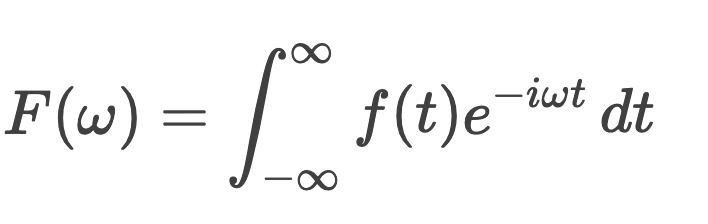

**1. f(t) (Señal en el tiempo)**
  - Qué es: La señal que quieres analizar (ej: un sonido, una onda de radio, un ECG).
  - Dominio: Está en función del tiempo (t). Por ejemplo, podría ser la amplitud de un sonido en cada instante.

**2. F(ω) (Transformada de Fourier)**
  - Qué es: El resultado de la operación; representa la señal en el dominio de la frecuencia.
  - Interpretación: Nos dice "qué frecuencias" componen f(t) y con qué intensidad (amplitud).
      - Si F(ω) tiene un pico en ω=100 rad/s, significa que f(t) contiene una oscilación fuerte a esa frecuencia.

**3. e −iωt (Núcleo exponencial complejo)**
  - Qué es: Una onda compleja (combinación de senos y cosenos) a frecuencia ω.
  - Fórmula de Euler: e −iωt=cos(ωt)−isin(ωt).
    - La parte real (cos) y la imaginaria (sin) actúan como "filtros" que detectan cuánto de f(t) coincide con la frecuencia w

**4. ω (Frecuencia angular)**
  - Qué es: La frecuencia de análisis (en radianes por segundo).
  - Relación con Hertz (Hz): ω=2πf, donde f es la frecuencia en Hz.

**5. ∞ ∫ −∞ (Integral sobre todo el tiempo)**
  - Qué hace: Evalua o promedia la contribución de f(t) a la frecuencia ω a lo largo de todo su historial temporal.
  - En la práctica: Para señales no periódicas (como un audio finito), se usan límites finitos o la Transformada Discreta de Fourier (DFT).

**Interpretación de forma resumida:**

La ecuación multiplica f(t) por una onda pura a frecuencia ω y luego integra.

- Si f(t) tiene una componente que "vibra" igual que e −iωt, la integral dará un valor grande (pico en F(ω)).

- Si no hay coincidencia, la integral será cercana a cero.

**Ejemplo con sonido**
Podemos imaginar a f(t) como un acorde de piano (3 notas). La Transformada de Fourier F(ω) mostrará 3 picos en las frecuencias de esas notas.

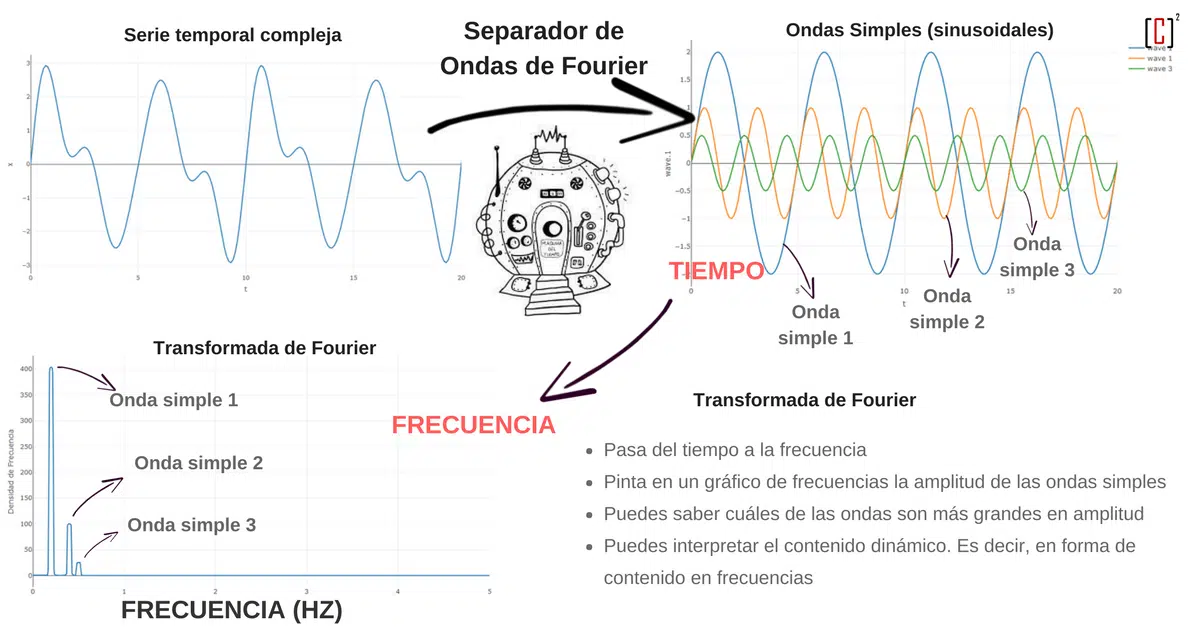

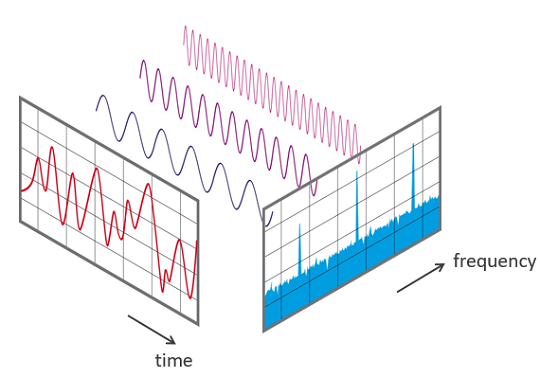

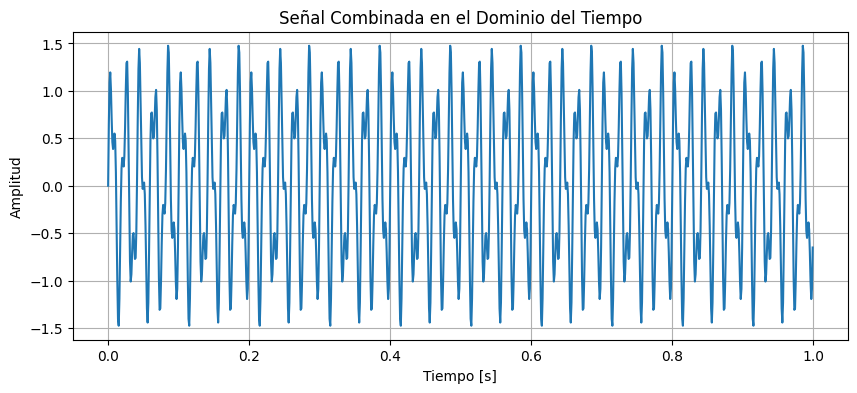

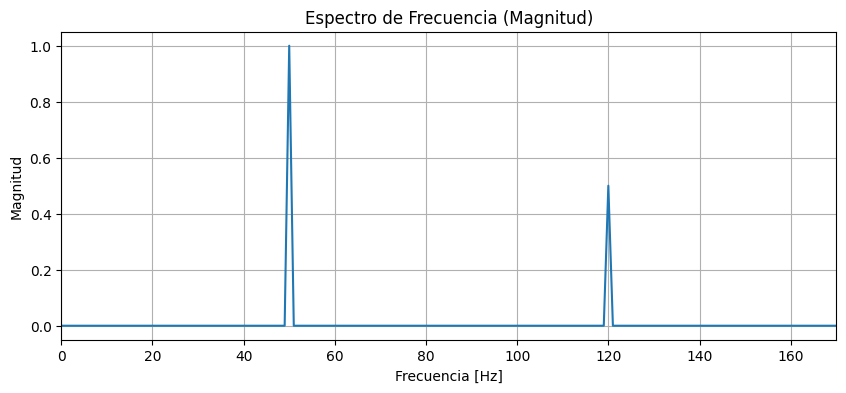

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Parámetros de la señal
sampling_rate = 1000  # Frecuencia de muestreo (muestras por segundo)
duration = 1          # Duración de la señal en segundos
frequency1 = 50       # Frecuencia de la primera onda senoidal
frequency2 = 120      # Frecuencia de la segunda onda senoidal

# Generar el eje de tiempo
t = np.linspace(0, duration, sampling_rate * duration, endpoint=False)

# Generar las dos ondas senoidales
signal1 = np.sin(2 * np.pi * frequency1 * t)
signal2 = 0.5 * np.sin(2 * np.pi * frequency2 * t) # Amplitud reducida para la segunda onda

# Combinar las ondas para crear la señal compuesta
combined_signal = signal1 + signal2

# Visualizar la señal en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, combined_signal)
plt.title('Señal Combinada en el Dominio del Tiempo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Aplicar la Transformada de Fourier
# La Transformada de Fourier Rápida (FFT) es una implementación eficiente
fft_result = fft(combined_signal)

# Calcular las frecuencias correspondientes
n = len(combined_signal)
frequencies = np.fft.fftfreq(n, 1/sampling_rate)

# Tomar la magnitud de la parte positiva del espectro de frecuencia
# Como la señal es real, el espectro es simétrico. Solo necesitamos la primera mitad.
positive_frequencies = frequencies[:n//2]
magnitude_spectrum = np.abs(fft_result)[:n//2] * 2 / n # Normalizar y tomar la magnitud

# Visualizar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Espectro de Frecuencia (Magnitud)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, max(frequency1, frequency2) + 50) # Ajustar el límite del eje x para mejor visualización
plt.show()

# Uso en Redes Recurrentes para Reconocimiento de Audio y Aplicación de la TF

## Conceptos clave:
- Transformada de Fourier: Matemáticamente descompone una señal en sus frecuencias componentes.

- Espectrograma: Representación visual de las frecuencias de una señal a lo largo del tiempo

## Importamos líbrerías necesarias

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import librosa  # Para procesamiento de audio
import librosa.display  # Para visualización
import tensorflow as tf  # Para la red neuronal
from sklearn.model_selection import train_test_split  # Para dividir datos

##1. Descargar y preparar un audio de ejemplo

- Usaremos un audio corto de ejemplo disponible online.

In [ ]:
# https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3
audio = "SoundHelix-Song-1.mp3"

# Cargamos el audio con librosa (esto descargará el archivo temporalmente)
# librosa.load carga el audio y lo convierte a un array numpy
# sr=None mantiene la frecuencia de muestreo original
# duration=10 limita a solo los primeros 10 segundos para simplificar
y, sr = librosa.load(audio, sr=None, duration=10)

# sr = 44100 Hz (muestras/segundo)
#y = 44100 * 10 = 441,000 muestras

# Mostramos información básica
print(f"Duración: {len(y)/sr} segundos")
print(f"Frecuencia de muestreo: {sr} Hz")
print(f"Número de muestras: {len(y)}")

Duración: 10.0 segundos
Frecuencia de muestreo: 44100 Hz
Número de muestras: 441000


##2. Visualización de la forma de onda

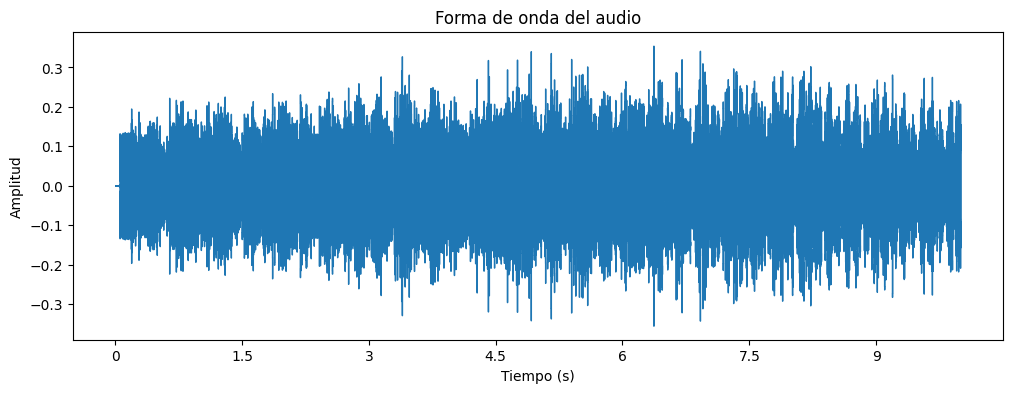

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Forma de onda del audio")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.show()

##3. Transformada de Fourier y Espectrograma
- La Transformada de Fourier nos permite ver qué frecuencias están presentes en el audio.

- Un espectrograma es una representación visual de las frecuencias que componen una señal sonora (u otra señal en el dominio de la frecuencia) en función del tiempo. Es una herramienta fundamental en campos como el procesamiento de señales, acústica, música, telecomunicaciones y análisis de vibraciones

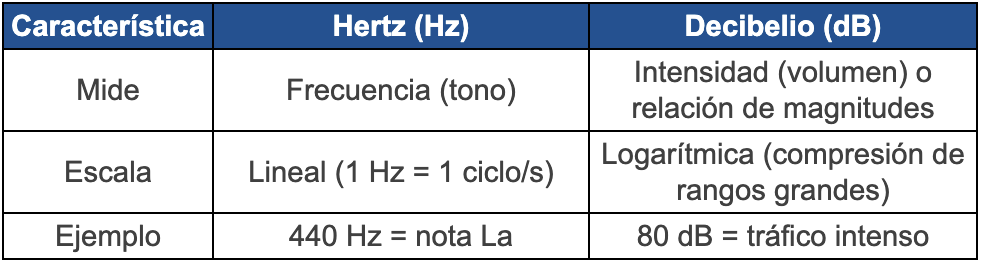

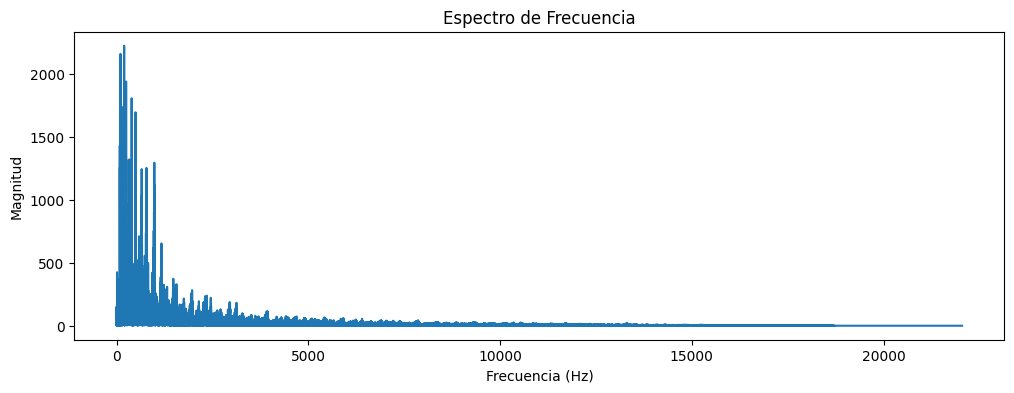

In [ ]:
# Calculamos la Transformada Rápida de Fourier (FFT)
# FFT es un algoritmo eficiente para calcular la Transformada de Fourier
fft = np.fft.fft(y)

# Calculamos la magnitud
magnitude = np.abs(fft)

# Creamos el eje de frecuencias
frequency = np.linspace(0, sr, len(magnitude))

# Solo mostramos la primera mitad (por simetría)
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

# Graficamos
plt.figure(figsize=(12, 4))
plt.plot(left_frequency, left_magnitude)
plt.title("Espectro de Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.show()

##4. Espectrograma (FFT en el tiempo)
Un espectrograma muestra cómo las frecuencias cambian con el tiempo.

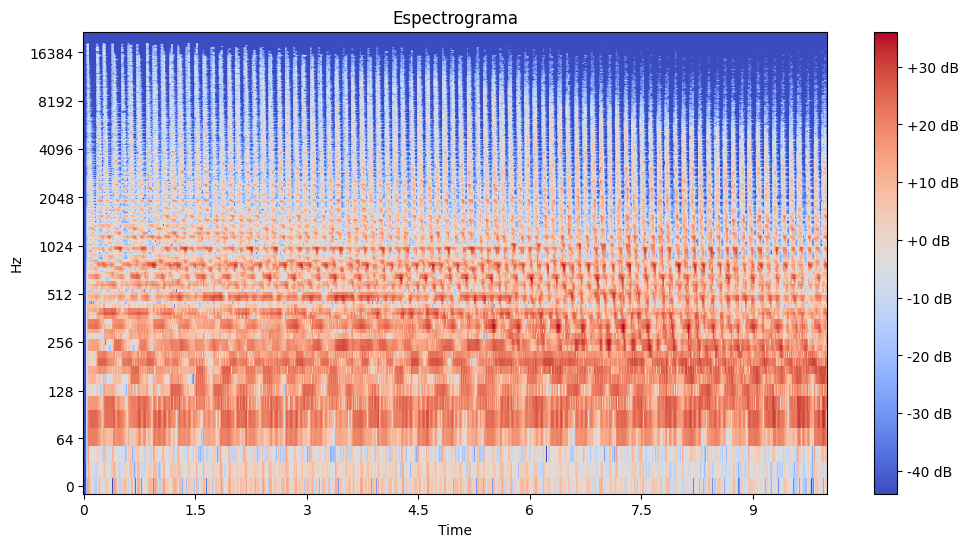

In [ ]:
# Calculamos el espectrograma usando STFT (Short-Time Fourier Transform)
n_fft = 2048 # tamaño de la ventana
hop_length = 512 # el paso entre ventanas

stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)  # Convertimos a magnitud

# Convertimos a decibelios para mejor visualización
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# Mostramos el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Espectrograma")
plt.show()

##5. Extracción de características (MFCCs)
Los coeficientes cepstrales de frecuencia Mel (MFCCs) son características comúnmente usadas en reconocimiento de audio.

* El ceptro (cepstrum) es la transformada inversa de Fourier del logaritmo del espectro de una señal, usado para separar componentes como fuente y filtro en audio

**¿Qué son los MFCCs?**

- Son coeficientes que representan la forma general del espectro de frecuencia de un sonido.

- Capturan:

  - Las características espectrales importantes

  - De una manera que se asemeja a cómo percibimos el sonido los humanos

**Analogía simple:**

- Imagina que quieres describir una canción a alguien:

- No le dices "hay un tono a 1000Hz con amplitud X"

- Sino algo como "suena agudo, con graves fuertes, un poco nasal..."
Los MFCCs hacen algo similar: convierten datos técnicos del audio en características que tienen más sentido perceptual.

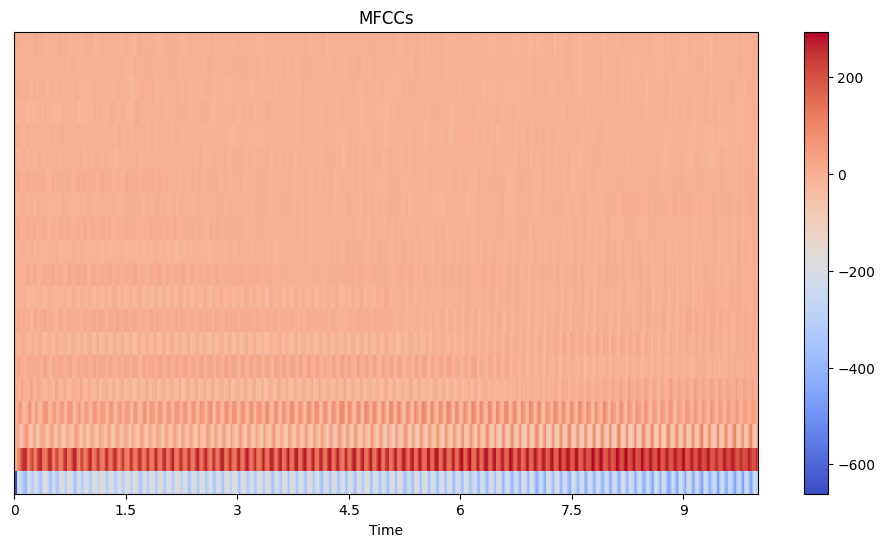

In [ ]:
# Extraemos MFCCs (generalmente se usan 13-40 coeficientes)
n_mfcc = 20
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Mostramos los MFCCs
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length, x_axis="time")
plt.colorbar()
plt.title("MFCCs")
plt.show()

##6. Preparación de datos para la RNN
Para simplificar, simularemos tener varios audios (en un caso real necesitariamos una base de datos)

In [ ]:
# Simulamos tener múltiples muestras dividiendo el audio en segmentos
segment_length = sr * 2  # 2 segundos
num_segments = len(y) // segment_length

# Creamos segmentos y calculamos sus MFCCs
X = []
for i in range(num_segments):
    start = i * segment_length
    end = start + segment_length
    segment = y[start:end]

    # Calculamos MFCCs para el segmento
    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=n_mfcc)
    X.append(mfcc.T)  # Transponemos para tener (time_steps, features)

# Convertimos a numpy array
X = np.array(X)

# Simulamos etiquetas (0 para este audio, en un caso real tendrías diferentes)
y_labels = np.zeros(num_segments)

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y_labels, test_size=0.2, random_state=42)

print(f"Forma de X_train: {X_train.shape}")  # (muestras, time_steps, features)
print(f"Forma de X_test: {X_test.shape}")

Forma de X_train: (4, 173, 20)
Forma de X_test: (1, 173, 20)


##7. Construcción del modelo RNN
Usaremos una RNN simple con capas LSTM (que son buenas para aprender patrones temporales).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Parámetros
input_shape = X_train.shape[1:]  # (time_steps, n_mfcc)
num_classes = 1  # Solo estamos reconociendo un audio en este ejemplo

# Construimos el modelo
model = Sequential([
    # Capa LSTM con 64 unidades (neuronas)
    # return_sequences=True pasa todas las salidas, no solo la última
    LSTM(64, input_shape=input_shape, return_sequences=True),
    Dropout(0.2),  # Regularización para prevenir sobreajuste

    # Segunda capa LSTM
    LSTM(64),
    Dropout(0.2),

    # Capa densa final con activación sigmoide (para clasificación binaria)
    Dense(num_classes, activation="sigmoid")
])

# Compilamos el modelo
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # Para clasificación binaria
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 173, 64)        │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 173, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,849 (214.25 KB)

 Trainable params: 54,849 (214.25 KB)

 Non-trainable params: 0 (0.00 B)

##8. Entrenamiento del modelo

In [ ]:
# Entrenamos el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Número de pasadas por todos los datos
    batch_size=16  # Número de muestras por actualización de gradiente
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.3708 - val_accuracy: 1.0000 - val_loss: 0.3070
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3539 - val_accuracy: 1.0000 - val_loss: 0.2345
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.2310 - val_accuracy: 1.0000 - val_loss: 0.1776
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.1632 - val_accuracy: 1.0000 - val_loss: 0.1331
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.0990
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.1124 - val_accuracy: 1.0000 - val_loss: 0.0736
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0826 - val_accuracy: 1.0000 - val_loss: 0.0552
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0500 - val_accuracy: 1.0000 - val_loss: 0.0420


##9. Evaluación del modelo

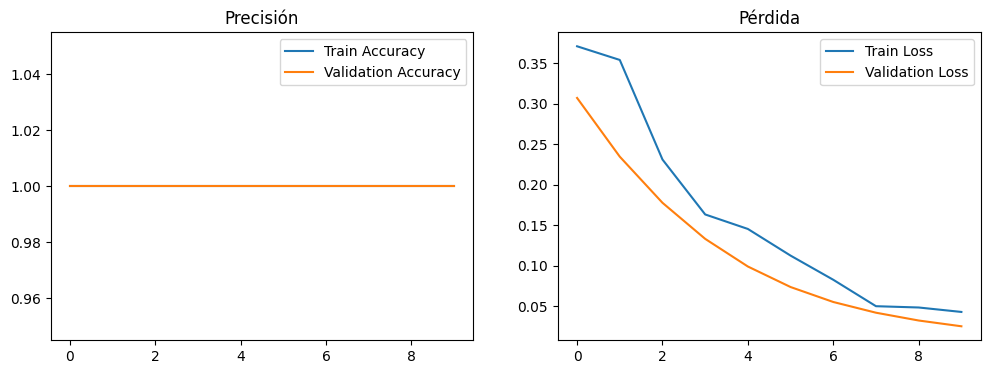

In [ ]:
# Graficamos precisión y pérdida
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Precisión")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Pérdida")
plt.show()